In [1]:
!uv add SimpSOM

Resolved 147 packages in 2.32s                                       
Prepared 1 package in 134ms                                              
Installed 1 package in 2ms                                  
 + simpsom==2.0.2


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)

Path to dataset files: /Users/furkanmelih/.cache/kagglehub/datasets/shwetabh123/mall-customers/versions/1


In [3]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv(f"{path}/Mall_Customers.csv")

In [13]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Resolved 148 packages in 788ms                                       
Prepared 1 package in 240ms                                              
Installed 1 package in 2ms                                  
 + seaborn==0.13.2


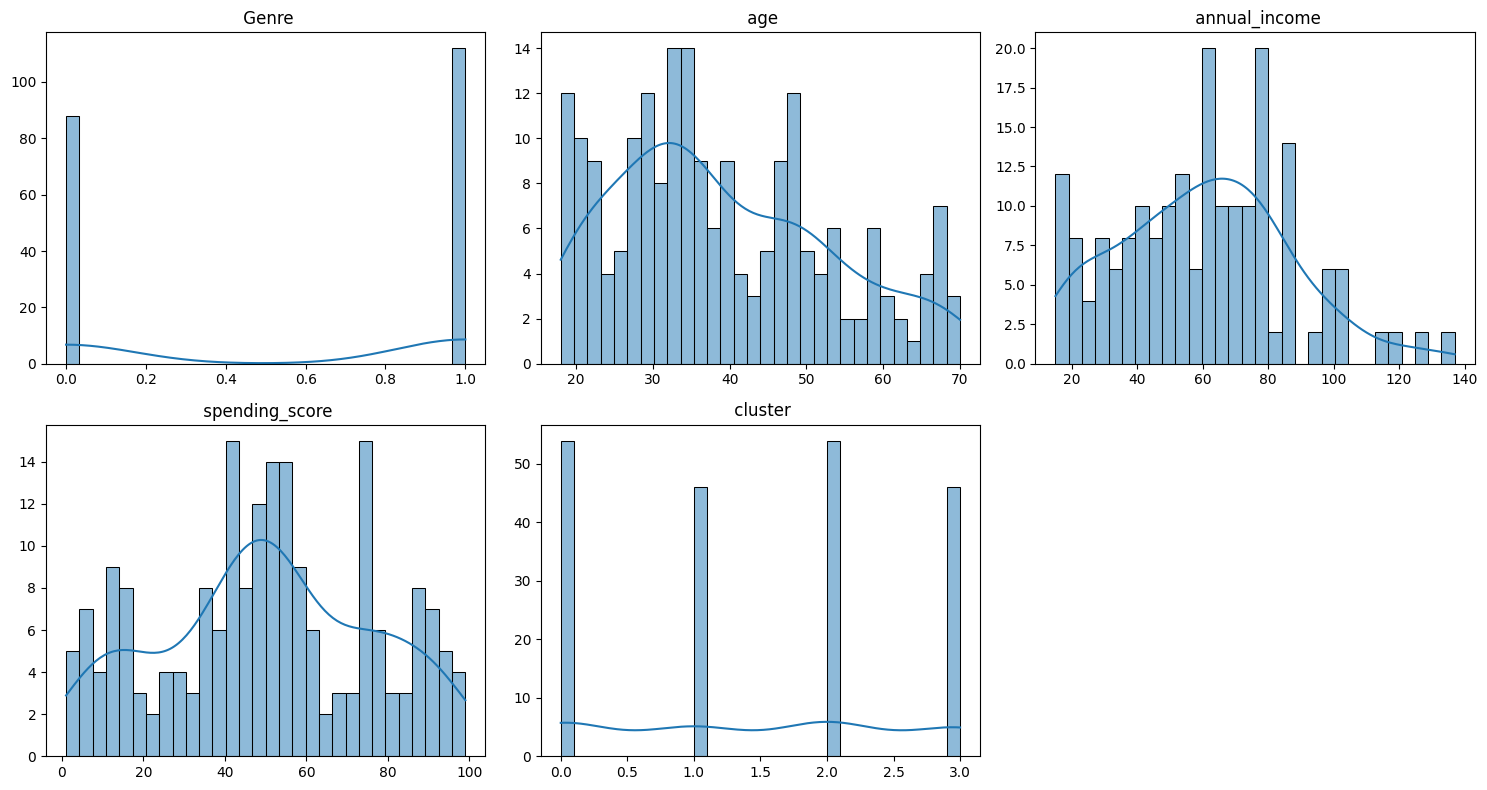

In [53]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_histograms(_df, title_prefix: str = ""):

    num_cols = _df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i , col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(_df[col], bins=30, kde=True)
        plt.title(f"{title_prefix} {col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

plot_all_histograms(df)

In [19]:
from simpsom import SOMNet
from sklearn.cluster import KMeans

In [20]:
del df["CustomerID"]

In [21]:
df["Age"] = df["Age"].astype(int)

In [22]:
df.isna().any().any()

np.False_

In [26]:
df = df.rename(columns={"Age": "age", "Annual Income (k$)": "annual_income", "Spending Score (1-100)": "spending_score"})

In [27]:
df.head()

,Genre,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [45]:
genre_to_code_hashmap = {
    "Male": 0,
    "Female": 1,
}
code_to_genre_hashmap = {
    0: "Male",
    1: "Female",
}


In [30]:

df["Genre"] = df["Genre"].replace("Male", 0).replace("Female", 1).astype(int)

/var/folders/yv/p9rv1x7d5djd944xl8m3wnyw0000gn/T/ipykernel_1692/1310580145.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Genre"] = df["Genre"].replace("Male", 0).replace("Female", 1).astype(int)


In [31]:
df.head()

,Genre,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [57]:
df = pd.DataFrame(df_scaled, columns=df.columns)

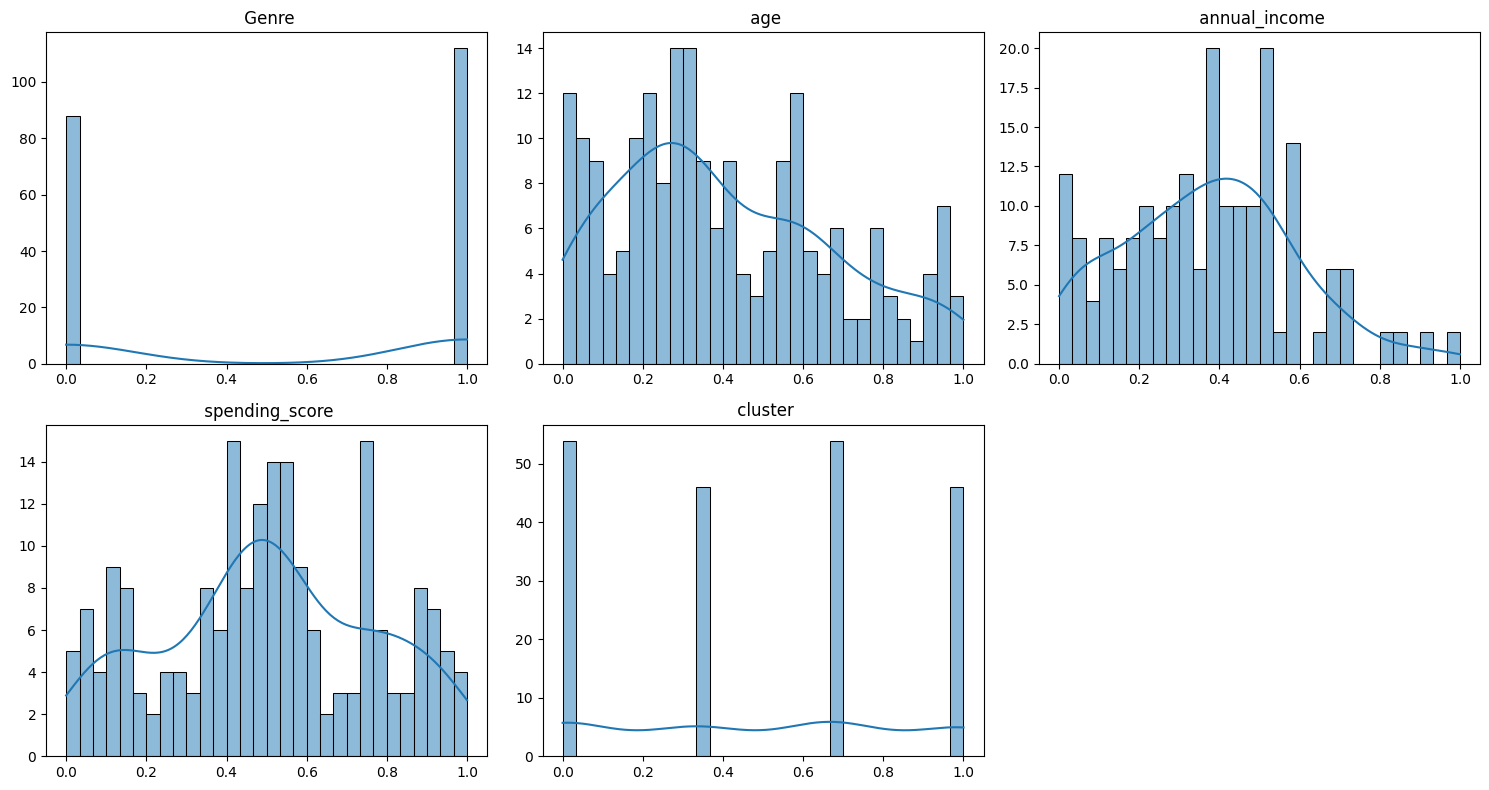

In [58]:
plot_all_histograms(df)

In [59]:
import scipy.cluster.hierarchy as sch

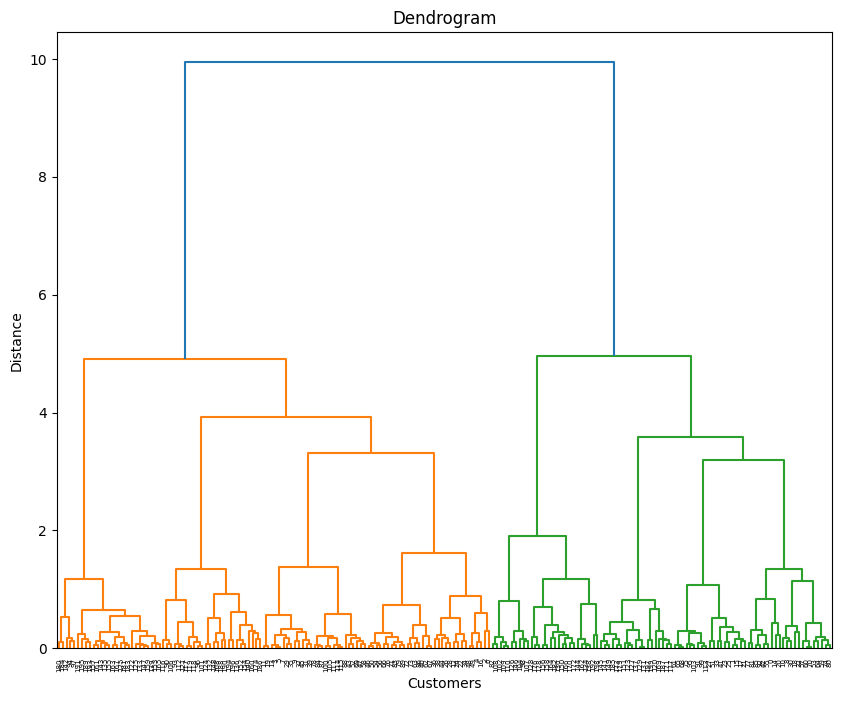

In [60]:
plt.figure(figsize=(10, 8))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
dendrogram = sch.dendrogram(sch.linkage(df, method="ward"))
plt.show()

In [32]:
net = SOMNet(20, 20, df.values, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialized with PCA.


In [35]:
net.train(start_learning_rate=0.01, epochs=30)

The map will be trained with the batch algorithm.
Training SOM... done!


In [36]:
hrt = np.array((net.project(df.values)))

/Users/furkanmelih/personal_projects/okul/yapay_zeka/.venv/lib/python3.12/site-packages/simpsom/network.py:629: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([pos[0]-0.125+random.random()*0.25 for pos in bmu_list],


<Figure size 640x480 with 0 Axes>

In [37]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=0).fit(hrt)

In [38]:
y_kmeans = kmeans.fit_predict(hrt)

In [39]:
y_kmeans

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 2, 0, 3, 1, 0, 3, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [41]:
df["cluster"] = y_kmeans

In [42]:
df.head()

,Genre,age,annual_income,spending_score,cluster
0,0,19,15,39,2
1,0,21,15,81,1
2,1,20,16,6,2
3,1,23,16,77,1
4,1,31,17,40,2


In [44]:
df_clustered = df.copy()

In [46]:
df_clustered["Genre"] = df["Genre"].apply(lambda x: code_to_genre_hashmap[x])

In [47]:
df_clustered.head()

,Genre,age,annual_income,spending_score,cluster
0,Male,19,15,39,2
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,2
